In [ ]:
import os

os.chdir("../")
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import glob
import data
import os
from astropy.table import Table, unique
from analysis_tools_cython import *
from post_processing_tools import *
from tqdm import tqdm
from astropy.stats import median_absolute_deviation, sigma_clip

In [ ]:
df_s10 = get_output("output_log_xrp/output_twostep_s6_new_betapic.txt")
df_s10_onestep = get_output("output_log_xrp/output_onestep_008_s10.txt")

### `maybeTransit`

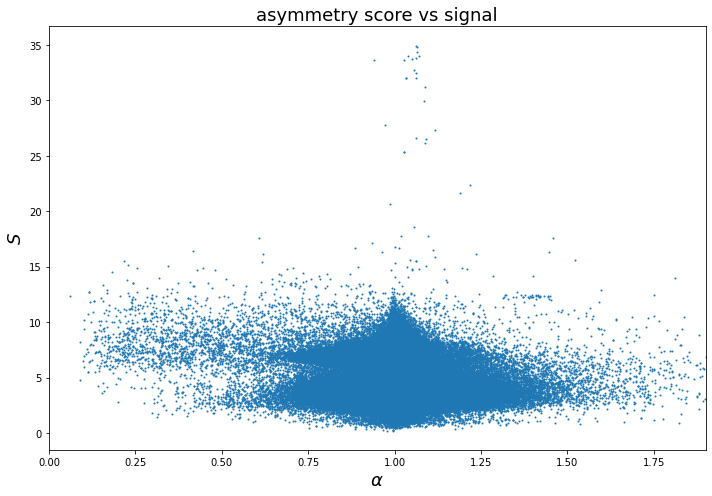

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(
    df_s10.asym_score[df_s10.transit_prob == "maybeTransit"],
    abs(df_s10["signal/noise"][df_s10.transit_prob == "maybeTransit"]),
    s=1,
)
ax.set_xlim(0, 1.9)
ax.set_ylim(5, 30)
ax.set_xlabel("$\\alpha$", fontsize=18)
ax.set_ylabel("$S$", fontsize=18)
ax.set_title("asymmetry score vs signal", fontsize=18)
fig.tight_layout()
# rect = patches.Rectangle((1.30, 7.40), 0.25, 4, linewidth=3, edgecolor='k', facecolor='none')
# interest_region = patches.Rectangle((1.05,7),3,20, linewidth=1,edgecolor='grey',facecolor='none') # region of interest in Kennedy et al
# ax.add_patch(rect)
# ax.add_patch(interest_region)
plt.show()

In [5]:
maybetransits = df_s10[df_s10["transit_prob"] == "maybeTransit"].head(1000)
maybetransits_onestep = df_s10_onestep[df_s10_onestep.transit_prob == "maybeTransit"]

In [6]:
print(len(maybetransits))
print(len(maybetransits_onestep))

1000
1429963


In [7]:
df = maybetransits_onestep[maybetransits_onestep.file.isin(maybetransits.file)].head(
    1000
)
df

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
69,tesslc_147408435.pkl,-7.448864,-3.191902,1587.368896,1.001960,0.940486,0.268415,1.062488,-0.000015,maybeTransit
75,tesslc_304291607.pkl,-9.869640,-4.176078,1579.326416,0.926709,0.337367,0.018046,0.520844,-0.003231,maybeTransit
162,tesslc_317634463.pkl,-10.237636,-4.711780,1574.201172,1.082272,0.165221,0.207234,0.250004,-0.022108,maybeTransit
208,tesslc_31105404.pkl,-10.288936,-3.767705,1586.927246,1.051430,0.472910,0.745111,0.666671,-0.007395,maybeTransit
236,tesslc_72670240.pkl,-6.625858,-2.958432,1576.140259,1.081304,0.051170,0.022588,0.166669,-0.001128,maybeTransit
...,...,...,...,...,...,...,...,...,...,...
801888,tesslc_362667761.pkl,-8.676490,-4.078522,1579.221436,1.036452,0.376009,2.103718,0.854170,-0.004294,maybeTransit
802000,tesslc_374933722.pkl,-6.892612,-2.823107,1579.242432,0.991572,0.235681,0.190554,0.375002,-0.005830,maybeTransit
802074,tesslc_378794635.pkl,-7.661728,-2.658317,1579.222290,1.034023,0.148716,0.260626,0.395842,-0.001296,maybeTransit
802113,tesslc_464070592.pkl,-7.315488,-4.604352,1578.326294,0.921427,3.383674,0.210822,0.958333,-0.019725,maybeTransit


In [8]:
sector = 10
clip = 4
path = "/storage/astro2/phrdhx/tesslcs"
mad_df = data.load_mad()

### Random lightcurves selected from Sector 10 (no processing has been done on this except for MAD)

In [9]:
# tic_file = []
# for i in random.file:
#     file_paths = glob.glob(os.path.join(path,f'**/**/{i}'))[0]
#     ref = pd.read_pickle(glob.glob(os.path.join(path,f'**/**/{i}'))[0])
#     table,store = import_XRPlightcurve(file_paths,sector=sector,clip=4,drop_bad_points=True)
#     camera = store[4]
#     tic = store[0]
#     chip = store[5]
#     fig,ax = plt.subplots(1,figsize=(10,6))
#     med = np.nanmedian(normalise_lc(table['corrected flux']))
#     mad = median_absolute_deviation(normalise_lc(table['corrected flux']),ignore_nan=True)
#     sig_clip_array = sigma_clip(normalise_lc(table['corrected flux']),sigma=6)
#     ax.scatter(table['time'],normalise_lc(table['corrected flux']),s=10,label='lightcurve')
#     ax.scatter(table['time'],sig_clip_array,s=10,c='orange',label='sigma clip to remove outliers')
#     ax.hlines(1-mad,xmin=table['time'][0],xmax=table['time'][-1],label='median line')
#     ax.set_title(f"TIC {tic}")
#     ax.legend()
#     tic_file.append(random.file)

### Twostep LS

If orange is seen, it means they overlap (no changes between the different LS powers.

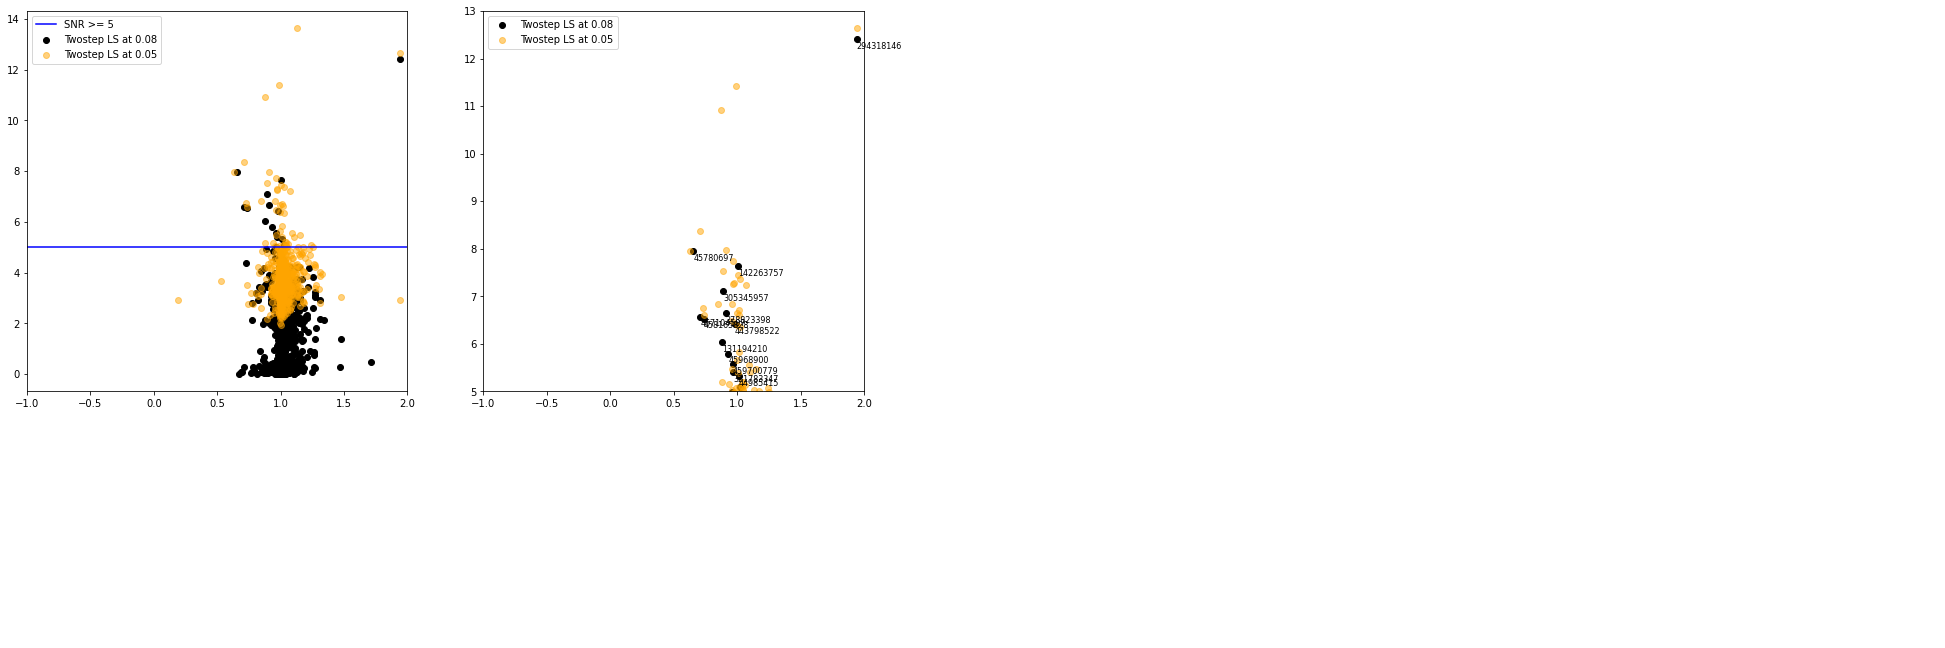

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].scatter(
    maybetransits.asym_score,
    abs(maybetransits["signal/noise"]),
    c="black",
    label="Twostep LS at 0.08",
)
# plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[0].axhline(y=5, color="blue", linestyle="-", label="SNR >= 5")
ax[0].scatter(
    df.asym_score,
    abs(df["signal/noise"]),
    c="orange",
    label="Twostep LS at 0.05",
    alpha=0.5,
)
ax[0].set_xlim([-1, 2])
ax[1].scatter(
    maybetransits.asym_score,
    abs(maybetransits["signal/noise"]),
    c="black",
    label="Twostep LS at 0.08",
)
# plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[1].scatter(
    df.asym_score,
    abs(df["signal/noise"]),
    c="orange",
    label="Twostep LS at 0.05",
    alpha=0.5,
)
ax[1].set_ylim([5, 13])
ax[1].set_xlim([-1, 2])
ax[0].legend()
ax[1].legend()
for idx, row in maybetransits.iterrows():
    ax[1].annotate(
        row["file"].split("_")[1].split(".pkl")[0],
        (row["asym_score"], abs(row["signal/noise"]) - 0.2),
        fontsize=8,
    )
# for idx, row in df.iterrows():
#     ax[1].annotate(row['file'].split('_')[1].split('.pkl')[0], (row['asym_score'], abs(row['signal/noise'])+10),fontsize=8)
plt.show()

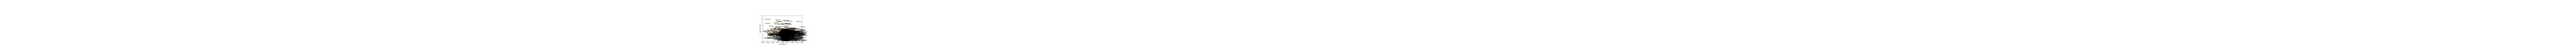

In [17]:
fig, ax = plt.subplots()
ax.scatter(maybetransits.asym_score, abs(maybetransits["signal/noise"]), s=5)
ax.scatter(df.asym_score, abs(df["signal/noise"]), color="orange", alpha=0.5)
ax.set_ylim([1, 9])
ax.set_xlim([0.9, 1.1])
ax.set_xlabel("asymmetry")
ax.set_ylabel("signal to noise")
for idx, row in maybetransits.iterrows():
    ax.annotate(
        row["file"].split("_")[1].split(".pkl")[0],
        (row["asym_score"], abs(row["signal/noise"]) - 0.2),
        fontsize=8,
    )
for idx, row in df.iterrows():
    ax.annotate(
        row["file"].split("_")[1].split(".pkl")[0],
        (row["asym_score"], abs(row["signal/noise"]) - 0.2),
        fontsize=8,
    )

In [29]:
maybetransits.loc[maybetransits.file == "tesslc_131194210.pkl"]

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
3264,tesslc_131194210.pkl,-24.604351,-6.039832,1592.620117,0.878213,0.063176,0.026528,0.145835,-0.04513,maybeTransit


In [30]:
df.loc[df.file == "tesslc_131194210.pkl"]

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
200257,tesslc_131194210.pkl,-24.604351,-10.923596,1592.620117,0.875145,0.063423,0.026767,0.145835,-0.046245,maybeTransit
